### 1. Understand the Goal
### Evaluate the scoring accuracy of a BERT-based automarker against human rater scores.

### Provide a recommendation on its suitability for high-stakes exams (e.g. university or visa).

### Highlight evaluation limitations and propose how to improve.

In [1]:
import pandas as pd

# Import the evaluation_set.csv, score_mappings.csv, and train_dev_set.csv.

eval_set = pd.read_csv("evaluation_set.csv")
mappings = pd.read_csv("score_mappings.csv")
dev_set = pd.read_csv("train_dev_set.csv")



### 2. Understand the Data


In [2]:
eval_info = eval_set.info()
print("**********************************************************")
train_info = dev_set.info()
print("**********************************************************")
score_map_info = mappings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_essay_id        504 non-null    object 
 1   split                  504 non-null    object 
 2   language               504 non-null    object 
 3   rater_score            504 non-null    int64  
 4   rater_cefr_level       504 non-null    object 
 5   rater_pass_fail        504 non-null    object 
 6   automarker_score       504 non-null    float64
 7   automarker_confidence  504 non-null    float64
 8   automarker_cefr_level  504 non-null    object 
 9   automarker_pass_fail   504 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 39.5+ KB
**********************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtyp

In [3]:

print(eval_set.head())
print("**********************************************************")
print(dev_set.head())
print("**********************************************************")
print(mappings.head())

          public_essay_id split    language  rater_score rater_cefr_level  \
0  essay_2ac79369bc34c7fe  test     Spanish            6               B1   
1  essay_1ae91fb5254845e4  test    Romanian            8               B2   
2  essay_d852da7006567a74  test       Hindi            7               B2   
3  essay_e08e377ad3af66e5  test  Vietnamese            6               B1   
4  essay_a3a0b1389dc5f6ef  test       Hindi            9               C1   

  rater_pass_fail  automarker_score  automarker_confidence  \
0            pass          7.063385               0.925097   
1            pass          7.533480               0.999735   
2            pass          7.116688               0.905183   
3            pass          5.969973               0.999991   
4            pass          8.424664               0.999905   

  automarker_cefr_level automarker_pass_fail  
0                    B2                 pass  
1                    B2                 pass  
2                    B2

### 2a. Plotting Scatterplot to understand how close the Automarker and Human Predictions are.

In [4]:
# Re-import libraries and reload evaluation dataset
# 
from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RMSE: 0.738
MAE: 0.565
R²: 0.805


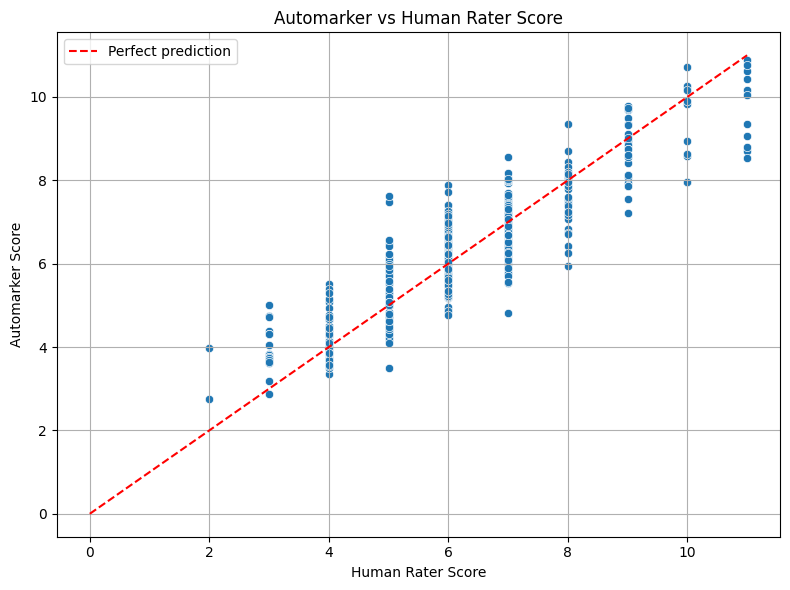

In [5]:
# Compute metrics
# rmse = mean_squared_error(eval_df['rater_score'], eval_df['automarker_score'], squared=False)
rmse = root_mean_squared_error(eval_set['rater_score'], eval_set['automarker_score'])
mae = mean_absolute_error(eval_set['rater_score'], eval_set['automarker_score'])
r2 = r2_score(eval_set['rater_score'], eval_set['automarker_score'])


# Print metrics
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

# Plot: Automarker vs Human Rater Score
# Plotting predicted vs actual scores
#
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rater_score', y='automarker_score', data=eval_set)
plt.plot([0, 11], [0, 11], '--r', label='Perfect prediction')
plt.xlabel('Human Rater Score')
plt.ylabel('Automarker Score')
plt.title('Automarker vs Human Rater Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2b. Plotting Confusion Matrix for CEFR Level Prediction of the Automarker

/home/kabir/anaconda3/envs/optmzd_rag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kabir/anaconda3/envs/optmzd_rag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kabir/anaconda3/envs/optmzd_rag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

<Figure size 800x600 with 0 Axes>

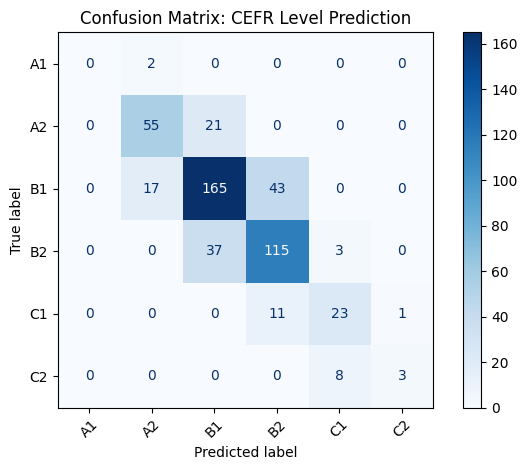

,precision,recall,f1-score,support
A1,0.000000,0.000000,0.000000,2.00000
A2,0.743243,0.723684,0.733333,76.00000
B1,0.739910,0.733333,0.736607,225.00000
B2,0.680473,0.741935,0.709877,155.00000
C1,0.676471,0.657143,0.666667,35.00000
C2,0.750000,0.272727,0.400000,11.00000
accuracy,0.716270,0.716270,0.716270,0.71627
macro avg,0.598350,0.521471,0.541081,504.00000
weighted avg,0.715012,0.716270,0.712766,504.00000


In [6]:
# Step 2: CEFR-level classification agreement

# Extract CEFR level columns
y_true_cefr = eval_set['rater_cefr_level']
y_pred_cefr = eval_set['automarker_cefr_level']


# Compute classification report
cefr_report = classification_report(y_true_cefr, y_pred_cefr, output_dict=True)
cefr_report_df = pd.DataFrame(cefr_report).transpose()


# Create confusion matrix
cefr_labels = sorted(eval_set['rater_cefr_level'].unique())
cm_cefr = confusion_matrix(y_true_cefr, y_pred_cefr, labels=cefr_labels)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cefr, display_labels=cefr_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: CEFR Level Prediction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cefr_report_df

### 2c. Plotting Confusion Matrix for Pass/Fail Prediction of the Automarker

<Figure size 600x500 with 0 Axes>

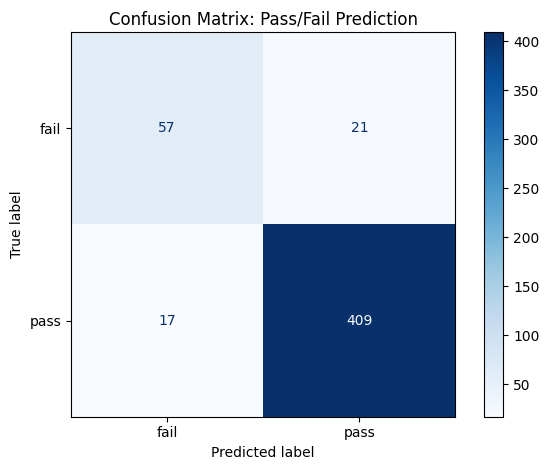

{'Accuracy': 0.9246031746031746,
 'Precision': 0.9511627906976744,
 'Recall': 0.960093896713615,
 'F1 Score': 0.955607476635514}

In [7]:
# Step 3: Pass/Fail Classification

# Extract pass/fail labels
y_true_pass = eval_set['rater_pass_fail']
y_pred_pass = eval_set['automarker_pass_fail']

# Compute binary classification metrics
pass_accuracy = accuracy_score(y_true_pass, y_pred_pass)
pass_precision = precision_score(y_true_pass, y_pred_pass, pos_label='pass')
pass_recall = recall_score(y_true_pass, y_pred_pass, pos_label='pass')
pass_f1 = f1_score(y_true_pass, y_pred_pass, pos_label='pass')

# Confusion matrix
cm_pass = confusion_matrix(y_true_pass, y_pred_pass, labels=['fail', 'pass'])

# Plot confusion matrix
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pass, display_labels=['fail', 'pass'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Pass/Fail Prediction")
plt.tight_layout()
plt.show()


# Output the metrics
{
    "Accuracy": pass_accuracy,
    "Precision": pass_precision,
    "Recall": pass_recall,
    "F1 Score": pass_f1
}

### 2d. Plotting Confidence Calibration

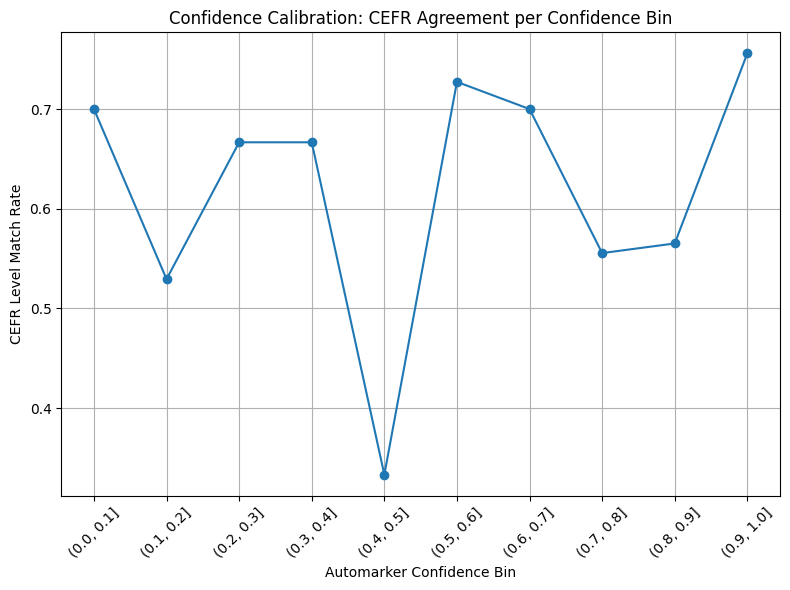

,confidence_bin,actual_accuracy
0,"(0.0, 0.1]",0.700000
1,"(0.1, 0.2]",0.529412
2,"(0.2, 0.3]",0.666667
3,"(0.3, 0.4]",0.666667
4,"(0.4, 0.5]",0.333333
5,"(0.5, 0.6]",0.727273
6,"(0.6, 0.7]",0.700000
7,"(0.7, 0.8]",0.555556
8,"(0.8, 0.9]",0.565217
9,"(0.9, 1.0]",0.755814


In [8]:
# Step 4: Confidence Calibration

# Create bins for confidence scores
eval_set['confidence_bin'] = pd.cut(eval_set['automarker_confidence'], bins=np.linspace(0, 1, 11))

# Check actual CEFR agreement per bin
eval_set['cefr_match'] = eval_set['rater_cefr_level'] == eval_set['automarker_cefr_level']
confidence_accuracy = eval_set.groupby('confidence_bin', observed=True)['cefr_match'].mean().reset_index()

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(confidence_accuracy['confidence_bin'].astype(str), confidence_accuracy['cefr_match'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Automarker Confidence Bin')
plt.ylabel('CEFR Level Match Rate')
plt.title('Confidence Calibration: CEFR Agreement per Confidence Bin')
plt.grid(True)
plt.tight_layout()
plt.show()

confidence_accuracy.rename(columns={'cefr_match': 'actual_accuracy'})